In [1]:
import tushare as ts
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import warnings;
warnings.simplefilter('ignore')

In [2]:
stcok_pairs = ['600199','600702']

In [3]:
data1 = ts.get_k_data('600199','2013-06-01','2014-12-31')[['date','close']]

In [4]:
data2 = ts.get_k_data('600702','2013-06-01','2014-12-31')['close']

In [5]:
data1.head()

,date,close
96,2013-06-03,15.480
97,2013-06-04,14.856
98,2013-06-05,15.019
99,2013-06-06,14.645
100,2013-06-07,14.222


In [6]:
data2.head()

96     17.320
97     16.930
98     17.144
99     16.843
100    16.609
Name: close, dtype: float64

In [8]:
# 将两张表格拼接一下
data = pd.concat([data1,data2],axis=1)
data.head()

,date,close,close
96,2013-06-03,15.480,17.320
97,2013-06-04,14.856,16.930
98,2013-06-05,15.019,17.144
99,2013-06-06,14.645,16.843
100,2013-06-07,14.222,16.609


In [9]:
data.set_index('date',inplace=True)

In [10]:
data.columns = stcok_pairs

In [11]:
data.head()

,600199,600702
date,,
2013-06-03,15.480,17.320
2013-06-04,14.856,16.930
2013-06-05,15.019,17.144
2013-06-06,14.645,16.843
2013-06-07,14.222,16.609


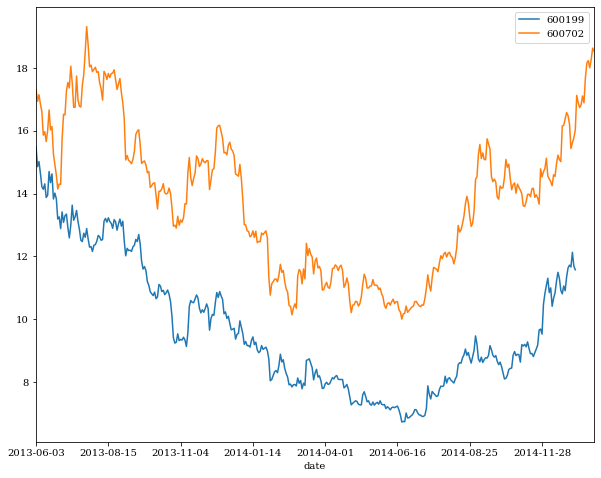

In [12]:
# 画图
data.plot(figsize=(10,8))

### 策略开发思路

In [13]:
data['priceDelta'] = data['600199'] - data['600702']

In [14]:
data.head()

,600199,600702,priceDelta
date,,,
2013-06-03,15.480,17.320,-1.840
2013-06-04,14.856,16.930,-2.074
2013-06-05,15.019,17.144,-2.125
2013-06-06,14.645,16.843,-2.198
2013-06-07,14.222,16.609,-2.387


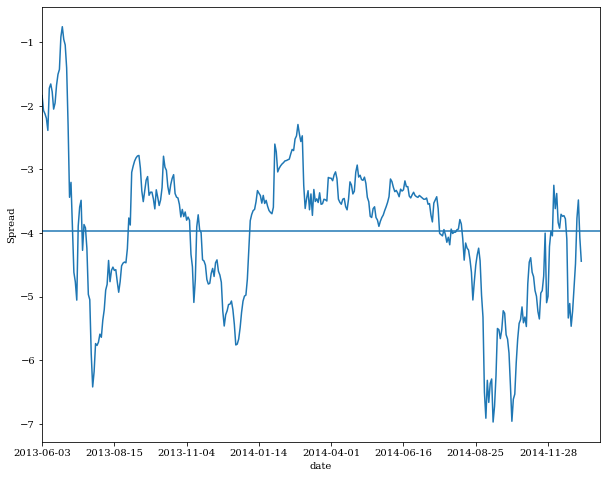

In [16]:
data['priceDelta'].plot(figsize=(10,8))
plt.ylabel('Spread')
plt.axhline(data['priceDelta'].mean())

In [18]:
import numpy as np
data['zscore'] = (data['priceDelta'] - np.mean(data['priceDelta'])) / np.std(data['priceDelta'])

In [19]:
data.head()

,600199,600702,priceDelta,zscore
date,,,,
2013-06-03,15.480,17.320,-1.840,1.962060
2013-06-04,14.856,16.930,-2.074,1.745803
2013-06-05,15.019,17.144,-2.125,1.698670
2013-06-06,14.645,16.843,-2.198,1.631205
2013-06-07,14.222,16.609,-2.387,1.456536


In [20]:
data[data['zscore'] > 1.5].head()

,600199,600702,priceDelta,zscore
date,,,,
2013-06-03,15.480,17.320,-1.840,1.962060
2013-06-04,14.856,16.930,-2.074,1.745803
2013-06-05,15.019,17.144,-2.125,1.698670
2013-06-06,14.645,16.843,-2.198,1.631205
2013-06-13,14.136,15.859,-1.723,2.070189


In [21]:
data[data['zscore'] < -1.5].head()

,600199,600702,priceDelta,zscore
date,,,,
2013-07-24,12.611,18.512,-5.901,-1.791018
2013-07-25,12.886,19.307,-6.421,-2.271590
2013-07-26,12.562,18.741,-6.179,-2.047939
2013-07-29,12.297,18.036,-5.739,-1.641302
2013-07-30,12.317,18.086,-5.769,-1.669027


### 产生交易策略

In [24]:
data['position_1'] = np.where(data['zscore'] > 1.5,-1,np.nan)

In [25]:
data['position_1'] = np.where(data['zscore'] < -1.5,1,data['position_1'])

In [26]:
data['position_1'] = np.where(abs(data['zscore']) < 0.5,0,data['position_1'])

In [27]:
data.head()

,600199,600702,priceDelta,zscore,position_1
date,,,,,
2013-06-03,15.480,17.320,-1.840,1.962060,-1.0
2013-06-04,14.856,16.930,-2.074,1.745803,-1.0
2013-06-05,15.019,17.144,-2.125,1.698670,-1.0
2013-06-06,14.645,16.843,-2.198,1.631205,-1.0
2013-06-07,14.222,16.609,-2.387,1.456536,NaN


### 产生交易信号

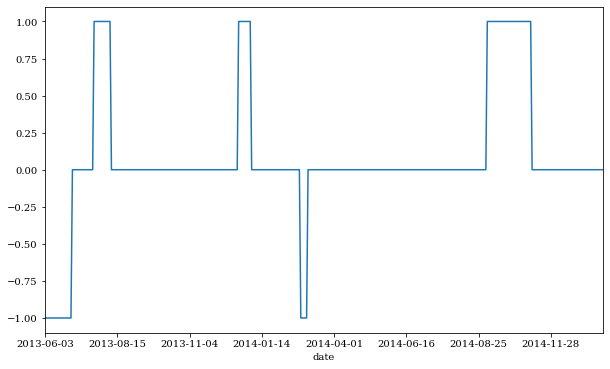

In [29]:
data['position_1'] = data['position_1'].fillna(method='ffill')
data['position_1'].plot(ylim=[-1.1,1.1],figsize=(10,6))
data['position_2'] = -np.sign(data['position_1'])

In [31]:
data.head(50)

,600199,600702,priceDelta,zscore,position_1,position_2
date,,,,,,
2013-06-03,15.480,17.320,-1.840,1.962060,-1.0,1.0
2013-06-04,14.856,16.930,-2.074,1.745803,-1.0,1.0
2013-06-05,15.019,17.144,-2.125,1.698670,-1.0,1.0
2013-06-06,14.645,16.843,-2.198,1.631205,-1.0,1.0
2013-06-07,14.222,16.609,-2.387,1.456536,-1.0,1.0
2013-06-13,14.136,15.859,-1.723,2.070189,-1.0,1.0
2013-06-14,14.309,15.966,-1.657,2.131184,-1.0,1.0
2013-06-17,13.876,15.655,-1.779,2.018435,-1.0,1.0
2013-06-18,13.944,15.996,-2.052,1.766135,-1.0,1.0


### 计算策略年化收益并可视化

In [32]:
data['return_1'] = np.log(data['600199'] / data['600199'].shift(1))
data['return_2'] = np.log(data['600702'] / data['600702'].shift(1))
data.head()

,600199,600702,priceDelta,zscore,position_1,position_2,return_1,return_2
date,,,,,,,,
2013-06-03,15.480,17.320,-1.840,1.962060,-1.0,1.0,NaN,NaN
2013-06-04,14.856,16.930,-2.074,1.745803,-1.0,1.0,-0.041145,-0.022775
2013-06-05,15.019,17.144,-2.125,1.698670,-1.0,1.0,0.010912,0.012561
2013-06-06,14.645,16.843,-2.198,1.631205,-1.0,1.0,-0.025217,-0.017713
2013-06-07,14.222,16.609,-2.387,1.456536,-1.0,1.0,-0.029309,-0.013990


In [33]:
data['strategy'] = 0.5 * (data['position_1'].shift(1) * data['return_1']) + 0.5 *(data['position_2'].shift(1) * data['return_2'])

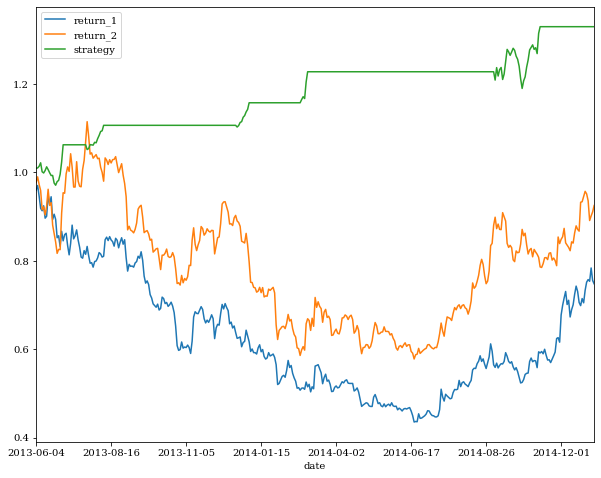

In [34]:
data[['return_1','return_2','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,8))

### 第二种方法

In [35]:
# 数据准备
data1 = ts.get_k_data('600199','2013-06-01','2014-12-31')[['date','close']]

In [37]:
data2 = ts.get_k_data('600702','2013-06-01','2014-12-31')['close']

In [38]:
data = pd.concat([data1,data2],axis=1)

In [39]:
data.set_index('date',inplace=True)

In [40]:
data.columns = stcok_pairs

In [41]:
data.head()

,600199,600702
date,,
2013-06-03,15.480,17.320
2013-06-04,14.856,16.930
2013-06-05,15.019,17.144
2013-06-06,14.645,16.843
2013-06-07,14.222,16.609


In [43]:
data.iloc[:,0]

date
2013-06-03    15.480
2013-06-04    14.856
2013-06-05    15.019
2013-06-06    14.645
2013-06-07    14.222
2013-06-13    14.136
2013-06-14    14.309
2013-06-17    13.876
2013-06-18    13.944
2013-06-19    14.702
2013-06-20    14.347
2013-06-21    14.626
2013-06-24    13.828
2013-06-25    14.015
2013-06-26    13.838
2013-06-27    13.190
2013-06-28    13.259
2013-07-01    12.886
2013-07-02    13.416
2013-07-03    13.082
2013-07-04    13.298
2013-07-05    13.347
2013-07-08    12.915
2013-07-09    12.591
2013-07-10    12.994
2013-07-11    13.632
2013-07-12    13.151
2013-07-15    13.259
2013-07-16    13.465
2013-07-17    13.112
               ...  
2014-12-09    10.415
2014-12-10    10.673
2014-12-11    10.842
2014-12-12    11.209
2014-12-15    11.496
2014-12-16    11.308
2014-12-17    10.921
2014-12-18    10.812
2014-12-19    11.060
2014-12-22    10.911
2014-12-23    11.348
2014-12-24    11.635
2014-12-25    11.725
2014-12-26    11.665
2014-12-29    12.131
2014-12-30    11.695
2014-12-

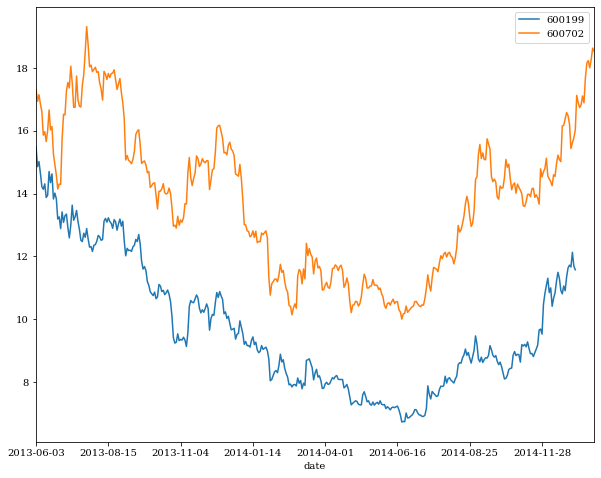

In [44]:
data.plot(figsize=(10,8))

### 策略开发思路

In [45]:
data.corr()

,600199,600702
600199,1.000000,0.880779
600702,0.880779,1.000000


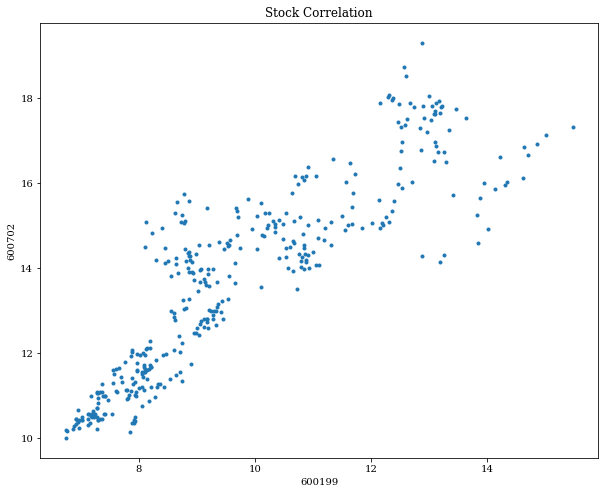

In [47]:
plt.figure(figsize=(10,8))
plt.title('Stock Correlation')
plt.plot(data['600199'],data['600702'],'.')
plt.xlabel('600199')
plt.ylabel('600702')
data.dropna(inplace=True)

In [48]:
[slope,intercept] = np.polyfit(data.iloc[:,0],data.iloc[:,1],1).round(2)
slope,intercept

(0.97, 4.28)

In [49]:
data['spread'] = data.iloc[:,1] - (data.iloc[:,0]*slope + intercept)

In [50]:
data.head()

,600199,600702,spread
date,,,
2013-06-03,15.480,17.320,-1.97560
2013-06-04,14.856,16.930,-1.76032
2013-06-05,15.019,17.144,-1.70443
2013-06-06,14.645,16.843,-1.64265
2013-06-07,14.222,16.609,-1.46634


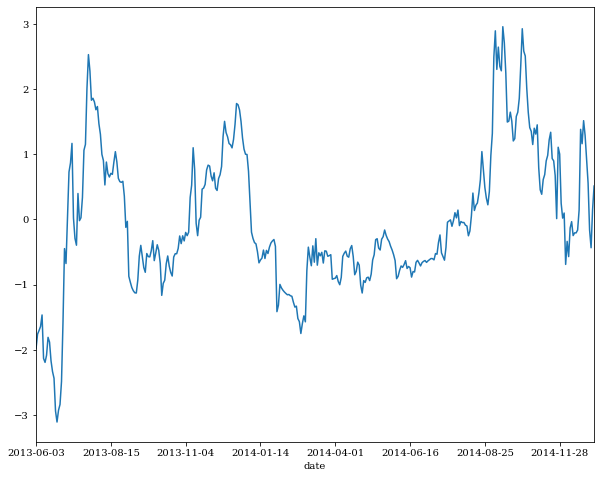

In [51]:
data['spread'].plot(figsize=(10,8))

In [53]:
data['zscore'] = (data['spread'] - data['spread'].mean()) / data['spread'].std()

In [54]:
data.head()

,600199,600702,spread,zscore
date,,,,
2013-06-03,15.480,17.320,-1.97560,-1.803530
2013-06-04,14.856,16.930,-1.76032,-1.604447
2013-06-05,15.019,17.144,-1.70443,-1.552762
2013-06-06,14.645,16.843,-1.64265,-1.495630
2013-06-07,14.222,16.609,-1.46634,-1.332586


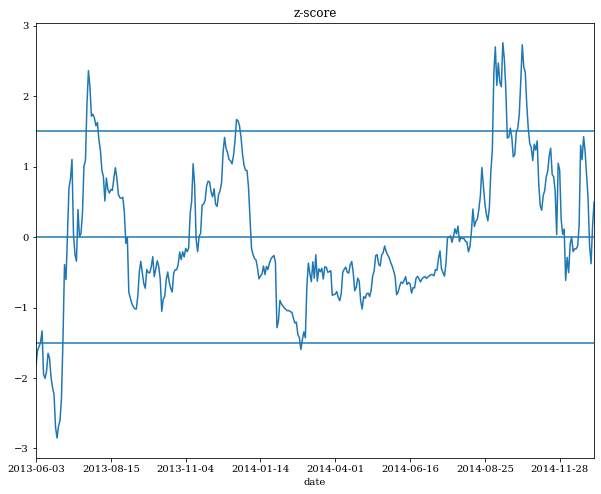

In [56]:
data['zscore'].plot(figsize=(10,8),title='z-score')
plt.axhline(1.5)
plt.axhline(0)
plt.axhline(-1.5)

### 产生交易信息

In [64]:
data['pos_1'] = np.where(data['zscore'] > 1.5,1,np.nan)
data['pos_1'] = np.where(data['zscore'] < -1.5,-1,data['pos_1'])
data['pos_1'] = np.where(abs(data['zscore']) < 0.5,0,data['pos_1'])

In [66]:
data['pos_1'] = data['pos_1'].fillna(method='ffill')

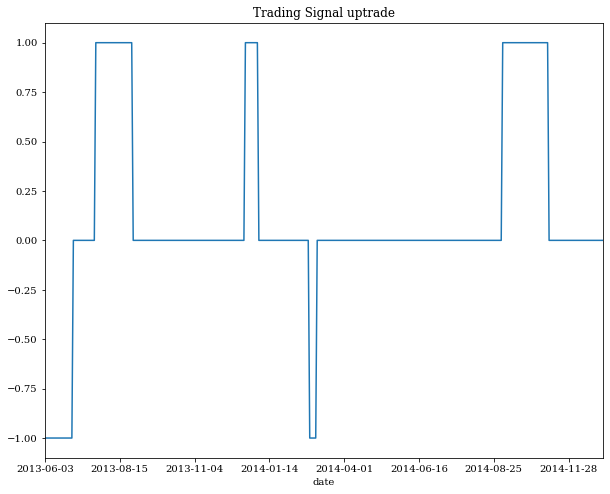

In [67]:
data['pos_1'].plot(ylim=[-1.1,1.1],figsize=(10,8),title='Trading Signal uptrade')

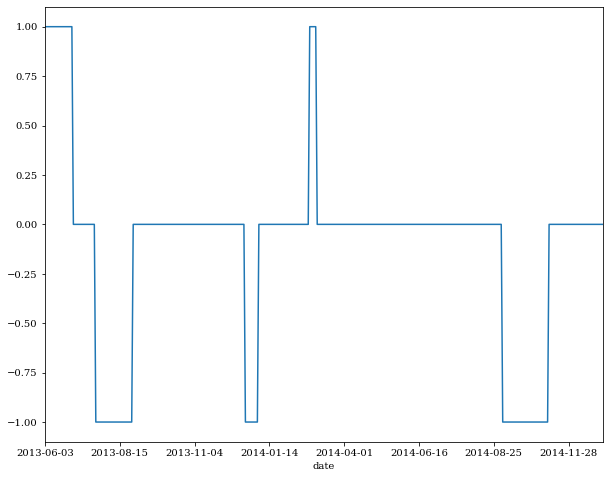

In [69]:
data['pos_2'] = -np.sign(data['pos_1'])
data['pos_2'].plot(figsize=(10,8))

In [71]:
### 交易策略的年化收益
data['return_1'] = np.log(data['600199'] / data['600199'].shift(1))
data['return_2'] = np.log(data['600702'] / data['600702'].shift(1))

In [72]:
data['strategy'] = 0.5 * data['pos_1'].shift(1) * data['return_1'] + 0.5 * data['pos_2'].shift(1) * data['return_2']

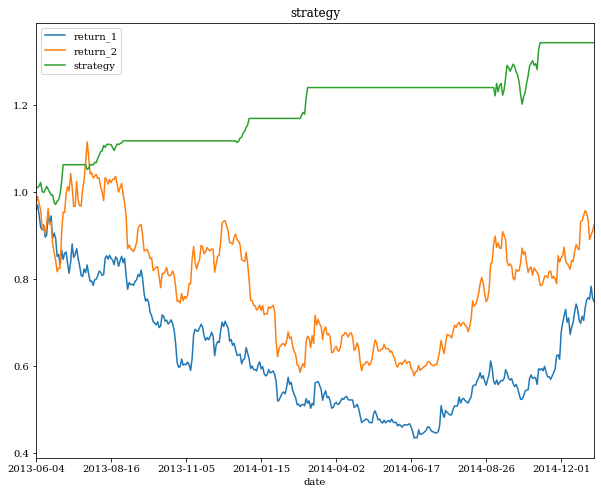

In [73]:
data[['return_1','return_2','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,8),title='strategy')